# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
salary_data = pd.read_csv('SalaryData_Train(1).csv')
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Understanding

In [3]:
salary_data.shape

(30161, 14)

In [4]:
salary_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [5]:
salary_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Preparation

In [6]:
le = LabelEncoder()
for column_names in salary_data.columns:
    if salary_data[column_names].dtype == object:
        salary_data[column_names] = le.fit_transform(salary_data[column_names])
    else:
        pass

In [7]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [8]:
salary_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [9]:
corr_matrix = salary_data.corr().round(2)
corr_matrix

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.00,0.08,-0.00,0.04,-0.28,-0.01,-0.25,0.02,0.08,0.08,0.06,0.10,-0.00,0.24
workclass,0.08,1.00,0.02,0.04,-0.03,0.02,-0.07,0.04,0.07,0.04,0.01,0.05,0.01,0.02
education,-0.00,0.02,1.00,0.35,-0.04,-0.04,-0.01,0.01,-0.03,0.03,0.01,0.06,0.08,0.08
educationno,0.04,0.04,0.35,1.00,-0.06,0.09,-0.09,0.03,0.01,0.12,0.08,0.15,0.09,0.34
maritalstatus,-0.28,-0.03,-0.04,-0.06,1.00,0.02,0.18,-0.07,-0.12,-0.04,-0.04,-0.19,-0.03,-0.19
occupation,-0.01,0.02,-0.04,0.09,0.02,1.00,-0.05,0.00,0.06,0.02,0.01,0.02,-0.00,0.05
relationship,-0.25,-0.07,-0.01,-0.09,0.18,-0.05,1.00,-0.12,-0.58,-0.06,-0.06,-0.26,-0.01,-0.25
race,0.02,0.04,0.01,0.03,-0.07,0.00,-0.12,1.00,0.09,0.01,0.02,0.05,0.13,0.07
sex,0.08,0.07,-0.03,0.01,-0.12,0.06,-0.58,0.09,1.00,0.05,0.05,0.23,0.00,0.22
capitalgain,0.08,0.04,0.03,0.12,-0.04,0.02,-0.06,0.01,0.05,1.00,-0.03,0.08,0.01,0.22


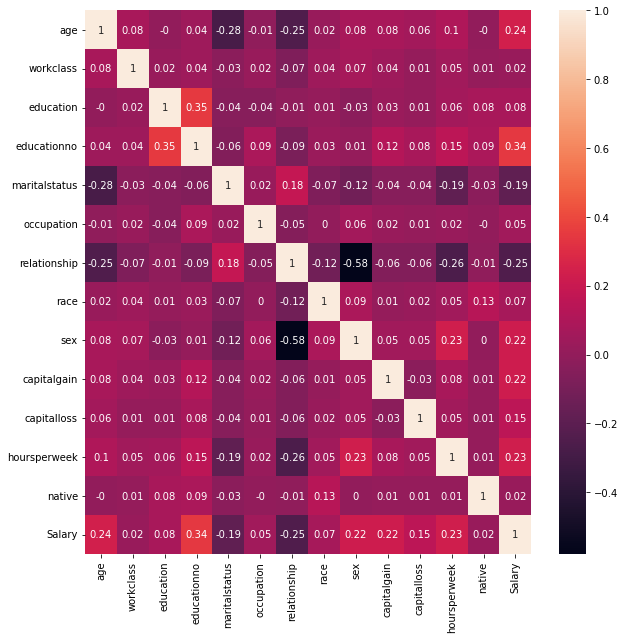

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Model Building

In [12]:
X = salary_data.drop(labels='Salary',axis=1) 
y = salary_data[['Salary']]

In [13]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.208958,-0.874459,0.736740,-0.387243,1.498958,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.244681,0.266358
30157,0.118914,-0.208958,0.174805,-0.439733,-0.387243,0.009964,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
30158,1.489339,-0.208958,0.174805,-0.439733,2.282996,-1.479030,1.612204,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358
30159,-1.251511,-0.208958,0.174805,-0.439733,0.947877,-1.479030,0.987725,0.385055,0.692771,-0.147447,-0.218508,-1.747187,0.266358


In [14]:
X_scaled.shape,y.shape

((30161, 13), (30161, 1))

# Model Training | Model Testing | Model Evaluation

In [15]:
def generate_clf(input_kernel):
    classifier = SVC(kernel=input_kernel)
    classifier.fit(X_scaled, y)
    y_pred = classifier.predict(X_scaled)
    print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
    return classifier

# Kernel = rbf

In [16]:
classifier_rbf = generate_clf('rbf')

Training Accuracy = 0.8512648784854614


# Kernel = polinomial

In [17]:
classifier_ply = generate_clf('poly')

Training Accuracy = 0.8432412718411193


# Kernel = Linear

In [18]:
classifier_lin = generate_clf('linear')

Training Accuracy = 0.810715825072113


# ===========================================================

# Model Testing on Test Data

In [19]:
salary_test_data = pd.read_csv('SalaryData_Test(1).csv')
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [20]:
le = LabelEncoder()
for column_names in salary_test_data.columns:
    if salary_test_data[column_names].dtype == object:
        salary_test_data[column_names] = le.fit_transform(salary_test_data[column_names])
    else:
        pass

In [21]:
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [22]:
X_test = salary_test_data.drop(labels='Salary',axis=1) 
y_test = salary_test_data[['Salary']]

In [23]:
test_std_scaler = StandardScaler()
X_test_scaled = test_std_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


# Model Testing on Test Data

In [24]:
def test_pred(classifier):
    y_test_pred = classifier.predict(X_test_scaled)
    print("Test Accuracy = {}".format(accuracy_score(y_test_pred, y_test).round(4)))
    print("Recall Score = {}".format(recall_score(y_test_pred, y_test).round(4)))
    print("Precision Score = {}".format(precision_score(y_test_pred, y_test).round(4)))
    print('Confusion Matrix =\n {}'.format(confusion_matrix(y_test_pred, y_test).round(4)))
    return test_pred

# Kernel = rbf

In [25]:
test_pred(classifier_rbf)

Test Accuracy = 0.8465
Recall Score = 0.7592
Precision Score = 0.5497
Confusion Matrix =
 [[10715  1666]
 [  645  2034]]


<function __main__.test_pred(classifier)>

# Kernel = polinomial

In [26]:
test_pred(classifier_ply)

Test Accuracy = 0.8406
Recall Score = 0.7565
Precision Score = 0.5181
Confusion Matrix =
 [[10743  1783]
 [  617  1917]]


<function __main__.test_pred(classifier)>

# Kernel = Linear

In [27]:
test_pred(classifier_lin)

Test Accuracy = 0.8093
Recall Score = 0.7706
Precision Score = 0.3186
Confusion Matrix =
 [[11009  2521]
 [  351  1179]]


<function __main__.test_pred(classifier)>

In [28]:
def test_accuracy(classifier):
    y_test_pred = classifier.predict(X_test_scaled)
    test_acc_score = (accuracy_score(y_test_pred, y_test).round(4))
    return test_acc_score

In [29]:
def train_accuracy(classifier):
    y_train_pred = classifier.predict(X_scaled)
    train_acc_score = (accuracy_score(y_train_pred, y).round(4))
    return train_acc_score

In [30]:
data = {'Model': ['classifier_rbf','classifier_pyl','classifier_lin'],
        'Train Accuracy': [train_accuracy(classifier_rbf),train_accuracy(classifier_ply),train_accuracy(classifier_lin)],
        'Test Accuracy': [test_accuracy(classifier_rbf), test_accuracy(classifier_ply),test_accuracy(classifier_lin)]
        }

In [31]:
df = pd.DataFrame(data)
df.sort_values(['Test Accuracy'],ascending=False)

,Model,Train Accuracy,Test Accuracy
0,classifier_rbf,0.8513,0.8465
1,classifier_pyl,0.8432,0.8406
2,classifier_lin,0.8107,0.8093


### From above data we can say that classifier_rbf is doing pretty good job in prediction so we can deploy classifier_rbf

In [32]:
from pickle import dump

In [33]:
dump(classifier_rbf,open('classifier_rbf.pkl','wb'))

In [34]:
from pickle import load

In [35]:
loaded_model_rbf = load(open('classifier_rbf.pkl','rb'))

In [36]:
y_loaded = loaded_model_rbf.predict(X_test)
accuracy_score(y_loaded, y_test).round(4)

0.7543

# THE END!!!